## Imports

In [ ]:
# ASE imports

from ase.io import read, write
from ase.visualize import view
from ase.build import molecule
from ase import Atoms

# NGLView imports

import nglview as nv

# MDAnalysis imports

import MDAnalysis as mda
from MDAnalysis.coordinates.PDB import PDBWriter

from MDAnalysis.transformations import fit_rot_trans, unwrap, center_in_box

import numpy as np

In [ ]:
#Load in last conformation

trp_cage_standard = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage.pdb", index = "27") #  Can't do -1 index...
#trp_cage_standard.write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb")


trp_cage_retro = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf.pdb", index = "9") #  Can't do -1 index...
#trp_cage_retro.write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf_trp_cage_retro_last_conform.pdb")

In [ ]:
print(len(trp_cage_standard))
print(len(trp_cage_retro))

284
304


In [ ]:
# Load a pre-equilibrated water box (TIP3P water model)
water = mda.Universe("tip3p.pdb")


# Trp-cage Standard
protein = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb")

# Trp-cage Retro
#protein = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf_trp_cage_retro_last_conform.pdb")

/mnt/c/Users/benwa/OneDrive/Documents/MPhil_Scientific_Computing/Written_Assignments/MACE_env/lib/python3.11/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


In [71]:
water_view = nv.show_mdanalysis(water)
water_view.add_representation('ball+stick', selection="not water")
water_view.center()
water_view

NGLWidget()

In [72]:
protein_view = nv.show_mdanalysis(protein)
protein_view.add_representation('ball+stick', selection="not protein")
protein_view.center()
protein_view

NGLWidget()

- Centre the water and protein before merging

In [73]:
# Center protein in the box
cog = protein.atoms.center_of_geometry()
print('Original Protein center of geometry: ', cog)
protein.atoms.positions -= cog
cog2 = protein.atoms.center_of_geometry()
print('New Protein center of geometry: ', cog2)

# Centre the water - use only a subset of the water system

cog = water.atoms.center_of_geometry()
print('Original Water Box center of geometry: ', cog)
water.atoms.positions -= cog
cog2 = water.atoms.center_of_geometry()
print('New Water Box center of geometry: ', cog2)

Original Protein center of geometry:  [29.16907045  1.08208098  0.54413732]
New Protein center of geometry:  [ 8.05921958e-08  3.46294591e-08 -2.49587891e-08]
Original Water Box center of geometry:  [15.01974079 15.07426628 15.08453929]
New Water Box center of geometry:  [-4.84270396e-09 -5.89962501e-08 -3.10187649e-08]


In [74]:
protein

<Universe with 284 atoms>

In [75]:
water.atoms

<AtomGroup with 2685 atoms>

In [77]:
# Combine protein + water
combined = mda.Merge(protein.atoms, water.atoms)

#combined.atoms.translate(-combined.atoms.center_of_mass())  # Centering

In [78]:
combined_view = nv.show_mdanalysis(combined)
combined_view.add_representation("ball+stick", selection="not protein")
combined_view

NGLWidget()

In [79]:
no_overlap = combined.select_atoms("same resid as (not around 3 protein)")

In [80]:
no_overlap_universe = mda.Merge(no_overlap)

In [81]:
no_overlap_view = nv.show_mdanalysis(no_overlap_universe)
no_overlap_view.add_representation("ball+stick", selection="not protein")
no_overlap_view

NGLWidget()

In [82]:
no_overlap_universe

<Universe with 2534 atoms>

In [ ]:
no_overlap_universe.atoms.write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/solvated_750_water_molecules_2jof_trp_cage.pdb")

/mnt/c/Users/benwa/OneDrive/Documents/MPhil_Scientific_Computing/Written_Assignments/MACE_env/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/mnt/c/Users/benwa/OneDrive/Documents/MPhil_Scientific_Computing/Written_Assignments/MACE_env/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'elements' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/mnt/c/Users/benwa/OneDrive/Documents/MPhil_Scientific_Computing/Written_Assignments/MACE_env/lib/python3.11/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/mnt/c/Users/benwa/OneDrive/Documents/MPhil_Scientific_Computing/Written_Assignments/MACE_env/lib/python3.11/site-

## Ensure constraints are reasonable, cell size, pbc etc

In [ ]:
solvated_protein = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/solvated_750_water_molecules_2jof_trp_cage.pdb")

In [ ]:
solvated_protein.center(vacuum=0.0)

- Look at positions in system

In [ ]:
# x axis

print(solvated_protein.positions[:, 0].min())
print(solvated_protein.positions[:, 0].max())

# y axis

print(solvated_protein.positions[:, 1].min())
print(solvated_protein.positions[:, 1].max())

# z axis

print(solvated_protein.positions[:, 2].min())
print(solvated_protein.positions[:, 2].max())

In [87]:
len(solvated_protein)

2534

In [88]:
solvated_protein

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N21Ne3Nh2O777Og3', pbc=True, cell=[1.0, 1.0, 1.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [89]:
print(solvated_protein.get_positions()[:,0].max())
print(solvated_protein.get_positions()[:,0].min())

print(solvated_protein.get_positions()[:,1].max())
print(solvated_protein.get_positions()[:,1].min())

print(solvated_protein.get_positions()[:,2].max())
print(solvated_protein.get_positions()[:,2].min())

15.504
-15.563
15.592
-15.749
15.543
-15.748


- Set Cell size

In [90]:
solvated_protein.set_cell([34,34,34])

- Check PBCs and Cell size look correct

In [95]:
solvated_protein

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N21Ne3Nh2O777Og3', pbc=True, cell=[34.0, 34.0, 34.0], atomtypes=..., bfactor=..., occupancy=..., residuenames=..., residuenumbers=...)

In [94]:
altered_cell = nv.show_ase(solvated_protein)
altered_cell.add_representation("ball+stick", selection="not protein")
altered_cell

NGLWidget()

In [ ]:
solvated_protein.write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb")

**Add in TER flag manually to separate water and protein**

# Check equillibration of NPT

In [ ]:
npt_run = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/npt_equillibration_atm_300K_trp_cage_standard (2).traj", index = ":")

In [3]:
npt_run[-100:]

[Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.490440993609727, 31.490440993609727, 31.490440993609727], momenta=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.490874494084007, 31.490874494084007, 31.490874494084007], momenta=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.49206506159503, 31.49206506159503, 31.49206506159503], momenta=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.493308763621652, 31.493308763621652, 31.493308763621652], momenta=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.49298220571096, 31.49298220571096, 31.49298220571096], momenta=..., calculator=SinglePointCalculator(...)),
 Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.4918345

- 30 picoseconds or NPT equillibration

In [4]:
len(npt_run)

3295

In [5]:
npt_run[-1].get_volume()

31075.555321766256

In [6]:
npt_run[-1]

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.439307110978643, 31.439307110978643, 31.439307110978643], momenta=..., calculator=SinglePointCalculator(...))

In [7]:
npt_run[-1].get_positions()

array([[12.92301597, 25.25187106,  6.8679981 ],
       [11.8131827 , 23.74498405,  8.35006982],
       [12.60081842, 20.59631972, 11.22395814],
       ...,
       [15.04076394, 27.53182986, 16.34575456],
       [15.38834495, 27.9939819 , 17.20956008],
       [14.05513717, 27.82477183, 16.25240132]])

In [17]:
npt_run[-1].center()

In [18]:
print(npt_run[-1].get_positions()[:, 0].min())
print(npt_run[-1].get_positions()[:, 0].max())

print(npt_run[-1].get_positions()[:, 1].min())
print(npt_run[-1].get_positions()[:, 1].max())

print(npt_run[-1].get_positions()[:, 2].min())
print(npt_run[-1].get_positions()[:, 2].max())

-0.6083510509147134
35.69413899516965
-1.4077562546519173
36.493544198906854
1.1437535789332398
33.942034365321696


In [8]:
view(npt_run[-1], viewer = 'x3d')

In [9]:
npt_run[-1]

Atoms(symbols='C54H1609Ca20Cd13Ce5He9Hg18N23Ne3O780', pbc=True, cell=[31.439307110978643, 31.439307110978643, 31.439307110978643], momenta=..., calculator=SinglePointCalculator(...))

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/optimized_structures/trp_cage_30ps_npt_equi_structure.pdb", npt_run[-1])

## Energies

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
standard_trp_cage_300k =  pd.read_fwf('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/energy_files/vacuum_npt_production_1_md_log_300K_trp_cage_standard.txt')

In [ ]:
standard_trp_cage_300k.columns

Index(['Time[ps]', 'Etot/N[eV]', 'Epot/N[eV]', 'Ekin/N[eV]', 'T[K]',
       '---------------------- stress', '[GPa] -----------------------'],
      dtype='object')

In [ ]:
standard_trp_cage_300k

,Time[ps],Etot/N[eV],Epot/N[eV],Ekin/N[eV],T[K],---------------------- stress,[GPa] -----------------------
0,0.0,-6.1702,-6.2074,0.0373,288.3,-0.146 -0.116 -0.114,-0.001 0.007 0.022
1,1.0,-6.1587,-6.1976,0.0389,300.7,0.014 -0.068 -0.005,0.026 -0.015 -0.009
2,2.0,-6.1602,-6.1981,0.0379,293.2,0.074 -0.039 -0.032,-0.019 0.025 0.005
3,3.0,-6.1573,-6.1968,0.0396,306.0,-0.057 0.010 0.045,-0.004 -0.058 -0.000
4,4.0,-6.1624,-6.2007,0.0383,296.1,-0.027 -0.047 -0.009,0.008 -0.005 0.022
...,...,...,...,...,...,...,...
1007,896.0,-6.1735,-6.2123,0.0388,300.1,-0.034 0.044 -0.006,0.017 -0.023 0.007
1008,897.0,-6.1708,-6.2106,0.0398,307.6,-0.034 -0.039 -0.115,-0.023 0.018 0.002
1009,898.0,-6.1671,-6.2069,0.0397,307.5,-0.074 0.012 -0.090,0.002 -0.009 0.003
1010,899.0,-6.1664,-6.2084,0.0420,324.6,0.023 -0.049 -0.037,-0.014 -0.004 -0.027


## MAE of energies...

    - Etot: Total Energy

    - Epot: Potential Energy

    - Ekin: Kinetic Energy


Etot = Epot + Ekin


**Mean Absolute Error of Potential Energies and of Force...!!!**

- Total energy over time

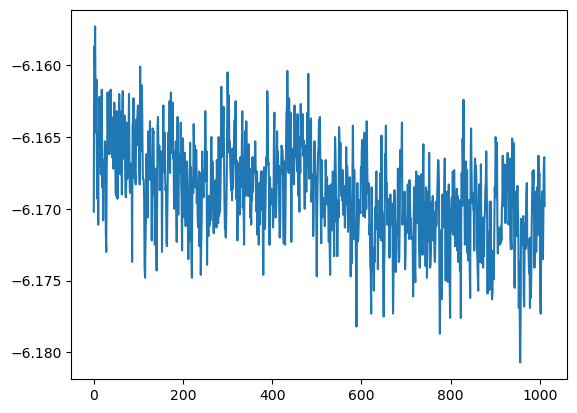

In [ ]:
plt.plot(standard_trp_cage_300k['Etot/N[eV]'])